PRML Lab - 8
Ayush Abrol B20AI052

Question 1

Importing necessary libraries

In [18]:
import pandas as pd
import numpy as np
import wave
import matplotlib.pyplot as plt
import random
import warnings
import IPython

In [19]:
warnings.filterwarnings("ignore")

Reading the 3 audio files.

In [20]:
sig1 = wave.open('signal_1.wav', 'r')
sig2 = wave.open('signal_2.wav', 'r')
sig3 = wave.open('signal_3.wav', 'r')

Parameters of the wave files

In [21]:
sig1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [22]:
sig2.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [23]:
sig3.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [24]:
# Extracting Raw Audio from Wav Files
sig1_raw = sig1.readframes(-1)
sig2_raw = sig2.readframes(-1)
sig3_raw = sig3.readframes(-1)

signal1 = np.fromstring(sig1_raw, 'int16')
signal2 = np.fromstring(sig2_raw, 'int16')
signal3 = np.fromstring(sig3_raw, 'int16')

In [25]:
print(signal1.shape)
signal1

(264515,)


array([  -23,   -16,   -28, ..., -8994, -9187, -9321], dtype=int16)

In [26]:
print(signal2.shape)
signal2

(264515,)


array([  -52,  -624, -1178, ..., -6313, -6713, -7091], dtype=int16)

In [27]:
print(signal3.shape)
signal3

(264515,)


array([2142, 2328, 2010, ..., 1296, 1332, 1754], dtype=int16)

Visualizing Audio Files

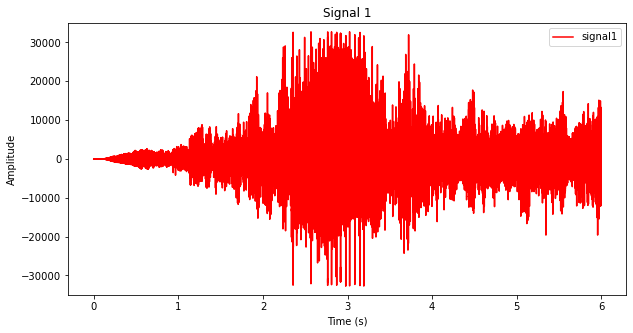

In [28]:
import matplotlib.pyplot as plt

fs1 = sig1.getframerate()
timing = np.linspace(0, len(signal1)/fs1, num=len(signal1))

plt.figure(figsize=(10,5))
plt.title('Signal 1')
plt.plot(timing, signal1, c = "red", label = "signal1")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-35000, 35000)
plt.legend()
plt.show()

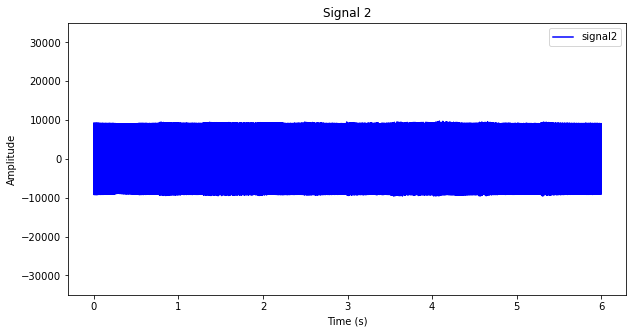

In [29]:
fs2 = sig2.getframerate()
timing = np.linspace(0, len(signal2)/fs2, num=len(signal2))

plt.figure(figsize=(10,5))
plt.title('Signal 2')
plt.plot(timing, signal2, c = "blue", label = "signal2")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-35000, 35000)
plt.legend()
plt.show()

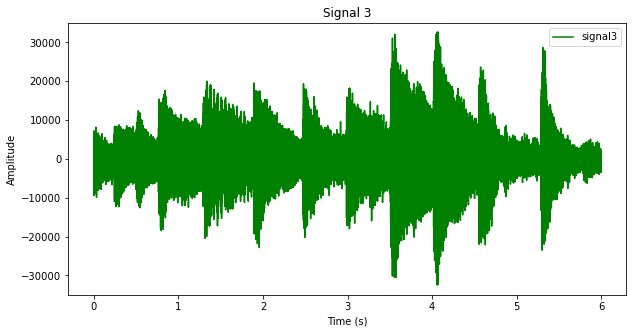

In [30]:
fs3 = sig3.getframerate()
timing = np.linspace(0, len(signal3)/fs3, num=len(signal3))

plt.figure(figsize=(10,5))
plt.title('Signal 3')
plt.plot(timing, signal3, c = "green", label = "signal3")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-35000, 35000)
plt.legend()
plt.show()

Listening to the audio

In [31]:
IPython.display.Audio('signal_1.wav')

In [32]:
IPython.display.Audio('signal_2.wav')

In [33]:
IPython.display.Audio('signal_3.wav')

In [34]:
X = list(zip(signal1, signal2, signal3))
X[:10]

[(-23, -52, 2142),
 (-16, -624, 2328),
 (-28, -1178, 2010),
 (-11, -1740, 1989),
 (-25, -2282, 1671),
 (-15, -2827, 1605),
 (-14, -3351, 1344),
 (-19, -3870, 1262),
 (-10, -4370, 1066),
 (-17, -4856, 976)]

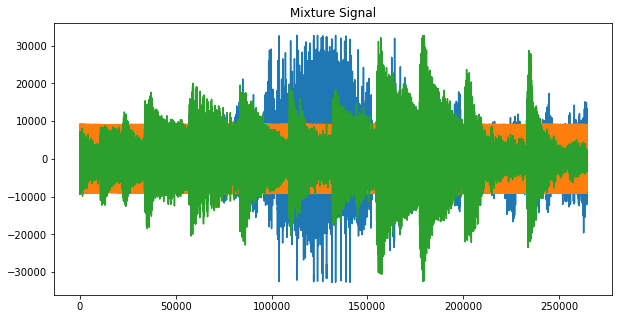

In [35]:
plt.figure(figsize=(10,5))
plt.title('Mixture Signal')
plt.plot(X, label = "mixture")
# plt.ylim(-0.010, 0.010)
plt.show()

Implementing ICA from scratch.

In [90]:

class IndependentComponentAnalysis_from_scratch:
    def __init__(self, X, n_components = 3, tolerance = 1e-5, max_iter=1000):
        self.X = np.array(X).T
        self.n_components = n_components
        self.components_nr = self.X.shape[0]
        self.max_iter = max_iter
        self.tolerance = tolerance

    def g(self, x):
        return np.tanh(x)

    def g_der(self, x):
        return 1 - self.g(x) * self.g(x)    

    def center(self):
        self.X = np.array(self.X)
        
        mean = self.X.mean(axis = 1, keepdims=True)
        return self.X - mean

    def whiten(self):
        cov_matrix = np.cov(self.X)
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
        D = np.diag(eigen_values)
        D_inv = np.sqrt(np.linalg.inv(D))
        X_whiten = np.dot(eigen_vectors, np.dot(D_inv, np.dot(eigen_vectors.T, self.X)))

        return X_whiten

    def calc_new_W(self, W):
        w_new = (self.X * self.g(np.dot(W.T, self.X))).mean(axis=1) - self.g_der(np.dot(W.T, self.X)).mean() * W
        w_new /= np.sqrt((w_new ** 2).sum())

        return w_new

    def fit(self):
        self.X = self.center()
        self.X = self.whiten()
        W = np.zeros((self.components_nr, self.components_nr), dtype = self.X.dtype)
        for i in range(self.components_nr):
            w = np.random.randn(self.components_nr)
            for j in range(self.max_iter):
                w_new = self.calc_new_W(w)
                if i >= 1:
                    w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
                distance = np.abs(np.abs(w * w_new).sum() - 1)
                w = w_new

                if distance < self.tolerance:
                    break
            W[i, :] = w        
        S = np.dot(W, self.X)
        return S

In [91]:
model = IndependentComponentAnalysis_from_scratch(X, n_components=3)
S_result_s = model.fit()
S_result_s = np.array(S_result_s).T
print(S_result_s.shape)
print(S_result_s)

(264515, 3)
[[ 3.36108421e-01 -1.02071259e-03 -2.22499611e-02]
 [ 3.61535606e-01 -1.33415150e-03 -1.13009352e-01]
 [ 3.08011064e-01  1.15221301e-03 -1.97624913e-01]
 ...
 [ 1.54104397e-01  1.41803744e+00 -9.90739312e-01]
 [ 1.56949321e-01  1.44892155e+00 -1.05345775e+00]
 [ 2.20536816e-01  1.47062295e+00 -1.11530971e+00]]


In [92]:
S_result1_s = S_result[:,0]
S_result2_s = S_result[:,1]
S_result3_s = S_result[:,2]

print(S_result1_s.shape)
print(S_result2_s.shape)
print(S_result3_s.shape)

(264515,)
(264515,)
(264515,)


Plotting mixture, real source and predicted source from the output of ICA.

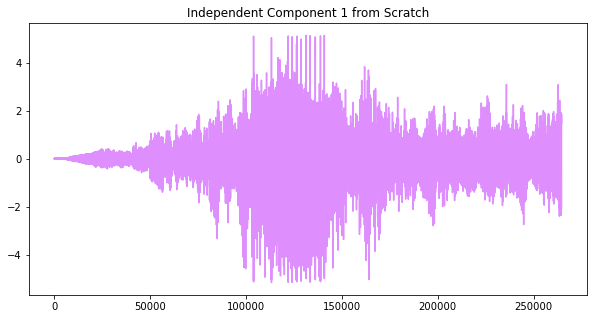

In [93]:
plt.figure(figsize=(10,5))
plt.title('Independent Component 1 from Scratch')
plt.plot(S_result1_s, c="#df8efd")
plt.show()

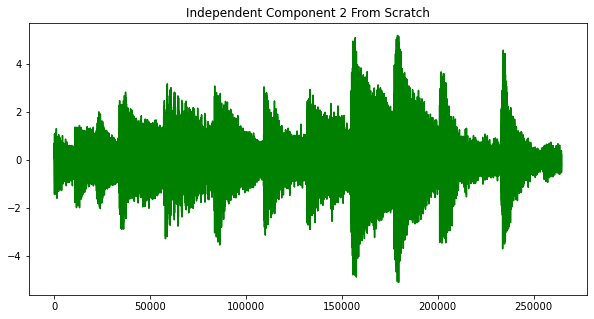

In [94]:

plt.figure(figsize=(10,5))
plt.title('Independent Component 2 From Scratch')
plt.plot(S_result2_s, c="green")
plt.show()

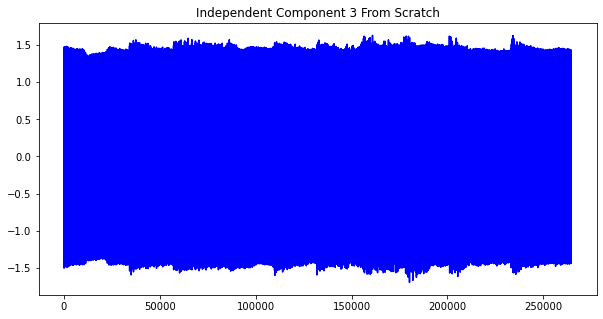

In [95]:

plt.figure(figsize=(10,5))
plt.title('Independent Component 3 From Scratch')
plt.plot(S_result3_s, c="blue")
plt.show()

In [96]:
from scipy.io import wavfile

S_result1_int_s = np.int16(S_result1_s/np.max(np.abs(S_result1_s)) * 32767)
S_result2_int_s = np.int16(S_result2_s/np.max(np.abs(S_result2_s)) * 32767)
S_result3_int_s = np.int16(S_result3_s/np.max(np.abs(S_result3_s)) * 32767)

# Writing wav files
wavfile.write('Scratch_Fast_ICA_1.wav', fs1, S_result1_int_s)
wavfile.write('Scratch_Fast_ICA_2.wav', fs2, S_result2_int_s)
wavfile.write('Scratch_Fast_ICA_3.wav', fs3, S_result3_int_s)

In [5]:
from playsound import playsound
playsound('Scratch_Fast_ICA_1.wav')

In [6]:
playsound('Scratch_Fast_ICA_2.wav')

In [7]:
playsound('Scratch_Fast_ICA_3.wav')

Implementing Fast ICA (import from sklearn.decomposition) selecting num_components = 3

In [38]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
S_result = ica.fit_transform(X)
print(S_result.shape)
print(S_result)

(264515, 3)
[[-1.58952985e-05  3.32580280e-07 -6.54760218e-04]
 [-1.90469554e-04 -1.47744398e-06 -7.11575657e-04]
 [-3.59564838e-04  1.62605830e-06 -6.14494633e-04]
 ...
 [-1.93810002e-03  2.74300544e-03 -3.70039069e-04]
 [-2.06042759e-03  2.80210713e-03 -3.80467215e-04]
 [-2.17597322e-03  2.84384915e-03 -5.08891591e-04]]


In [39]:
S_result1 = S_result[:,0]
S_result2 = S_result[:,1]
S_result3 = S_result[:,2]

print(S_result1.shape)
print(S_result2.shape)
print(S_result3.shape)

(264515,)
(264515,)
(264515,)


Separating, Visualizing and Listening the independent component obtained from task 5.

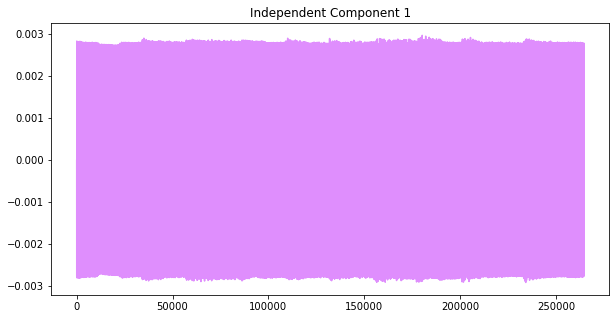

In [40]:
# Independent Component 1

plt.figure(figsize=(10,5))
plt.title('Independent Component 1')
plt.plot(S_result1, c="#df8efd")
plt.show()

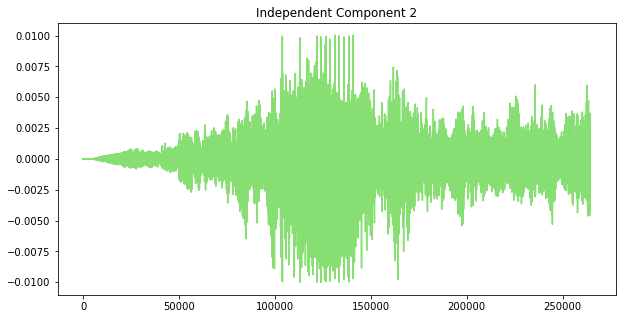

In [41]:
# Independent Component 2

plt.figure(figsize=(10,5))
plt.title('Independent Component 2')
plt.plot(S_result2, c="#87de72")
plt.show()

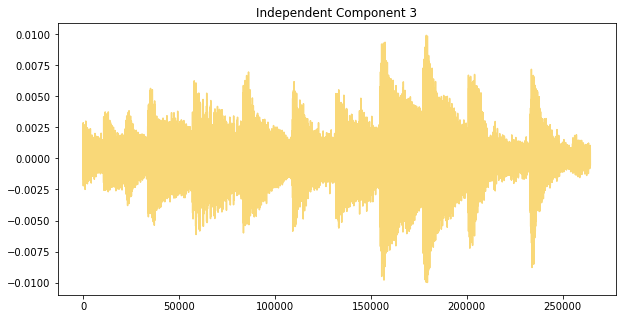

In [42]:
# Independent Component 3

plt.figure(figsize=(10,5))
plt.title('Independent Component 3')
plt.plot(S_result3, c="#f9d878")
plt.show()

In [43]:
from scipy.io import wavfile

S_result1_int = np.int16(S_result1/np.max(np.abs(S_result1)) * 32767)
S_result2_int = np.int16(S_result2/np.max(np.abs(S_result2)) * 32767)
S_result3_int = np.int16(S_result3/np.max(np.abs(S_result3)) * 32767)

# Writing wav files
wavfile.write('Fast_ICA_1.wav', fs1, S_result1_int)
wavfile.write('Fast_ICA_2.wav', fs2, S_result2_int)
wavfile.write('Fast_ICA_3.wav', fs3, S_result3_int)

In [2]:
from playsound import playsound
playsound('Fast_ICA_1.wav')

In [3]:
playsound('Fast_ICA_2.wav')

In [4]:
playsound('Fast_ICA_3.wav')

###############################################################################################################################################

Question 2 

Preprocess, clean and prepare the dataset based on the previous lab experience.
Separate features and labels as X and Y respectively.

In [44]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [45]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [46]:
df = df.iloc[:, 2:]

In [47]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [48]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for i in cols:
    df[i] = encoder.fit_transform(df[i])

In [50]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [52]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
X_train, y_train = df.iloc[:,:-1], df.iloc[:,-1]

Create an object of SFS by embedding Decision Tree classifier object, providing 10
features, forward as True, floating as False and scoring = accuracy.

In [54]:
model_object = SFS(DecisionTreeClassifier(random_state=1), forward = True, floating = False, scoring = 'accuracy', k_features=10)
model_object

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=1),
                          k_features=10, scoring='accuracy')

Train SFS and report accuracy for all 10 features. Also list the names of the 10 best
features selected by SFS.

In [55]:
model_object = model_object.fit(X_train, y_train)

In [56]:
model_object.subsets_

{1: {'feature_idx': (11,),
  'cv_scores': array([0.78927867, 0.79308022, 0.79038545, 0.79240653, 0.78676612]),
  'avg_score': 0.7903833960456308,
  'feature_names': ('Online boarding',)},
 2: {'feature_idx': (3, 11),
  'cv_scores': array([0.84798614, 0.85217266, 0.84798614, 0.85169145, 0.84860443]),
  'avg_score': 0.8496881632686332,
  'feature_names': ('Type of Travel', 'Online boarding')},
 3: {'feature_idx': (3, 6, 11),
  'cv_scores': array([0.89196863, 0.89307541, 0.8893701 , 0.89293104, 0.88897979]),
  'avg_score': 0.8912649918655335,
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Online boarding')},
 4: {'feature_idx': (3, 6, 9, 11),
  'cv_scores': array([0.91934941, 0.92319908, 0.91906068, 0.92445022, 0.92252166]),
  'avg_score': 0.9217162073206818,
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Gate location',
   'Online boarding')},
 5: {'feature_idx': (3, 6, 9, 11, 16),
  'cv_scores': array([0.92714499, 0.93046533, 0.92748183, 0.9

In [57]:
print("10 Best Features Selected by SFS: ", model_object.k_feature_names_)

10 Best Features Selected by SFS:  ('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Gate location', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Baggage handling', 'Inflight service')


Using the forward and Floating parameter toggle between SFS(forward True, floating
False), SBS (forward False, floating False), SFFS (forward True, floating True), SBFS
(forward False, floating True), and choose cross validation = 4 for each configuration.
Also report cv scores for each configuration.

In [58]:
SFS_model = SFS(k_features=10 ,cv=4, estimator=DecisionTreeClassifier(random_state = 1), forward=True, floating=False, scoring='accuracy')
SBS_model = SFS(k_features=10 ,cv=4, estimator=DecisionTreeClassifier(random_state = 1), forward=False, floating=False, scoring='accuracy', n_jobs=-1)
SFFS_model = SFS(k_features=10 ,cv=4, estimator=DecisionTreeClassifier(random_state = 1), forward=True, floating=True, scoring='accuracy')
SBFS_model = SFS(k_features=10 ,cv=4, estimator=DecisionTreeClassifier(random_state = 1), forward=False, floating=True, scoring='accuracy')

In [59]:

SFS_model.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=DecisionTreeClassifier(random_state=1),
                          k_features=10, scoring='accuracy')

In [60]:
SBS_model.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=DecisionTreeClassifier(random_state=1),
                          forward=False, k_features=10, n_jobs=-1,
                          scoring='accuracy')

In [61]:
SFFS_model.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=DecisionTreeClassifier(random_state=1),
                          floating=True, k_features=10, scoring='accuracy')

In [62]:
SBFS_model.fit(X_train, y_train)

SequentialFeatureSelector(cv=4,
                          estimator=DecisionTreeClassifier(random_state=1),
                          floating=True, forward=False, k_features=10,
                          scoring='accuracy')

In [63]:
d1 = SFS_model.get_metric_dict()
d2 = SBS_model.get_metric_dict()
d3 = SFFS_model.get_metric_dict()
d4 = SBFS_model.get_metric_dict()

print("Cross Validation Scores for SFS are: ",  d1[list(d1.keys())[-1]]['cv_scores'])
print("Cross Validation Scores for SBS are: ",  d2[list(d2.keys())[-1]]['cv_scores'])
print("Cross Validation Scores for SFFS are: ",  d3[list(d3.keys())[-1]]['cv_scores'])
print("Cross Validation Scores for SBFS are: ",  d4[list(d4.keys())[-1]]['cv_scores'])

Cross Validation Scores for SFS are:  [0.94933785 0.95006929 0.94926086 0.9513397 ]
Cross Validation Scores for SBS are:  [0.94687404 0.94702803 0.94818294 0.95049276]
Cross Validation Scores for SFFS are:  [0.9512627  0.95095473 0.95110872 0.9525716 ]
Cross Validation Scores for SBFS are:  [0.94687404 0.94702803 0.94818294 0.95049276]


Visualize the output from the feature selection in a pandas DataFrame format using the
get_metric_dict for all four configurations.

In [64]:
SFS_vis = SFS_model.get_metric_dict()
pd.DataFrame(SFS_vis).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(Online boarding,)",0.003933,0.002454,0.001417
2,"(3, 11)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(Type of Travel, Online boarding)",0.001959,0.001222,0.000705
3,"(3, 6, 11)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(Type of Travel, Inflight wifi service, Online...",0.001961,0.001224,0.000706
4,"(3, 6, 9, 11)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(Type of Travel, Inflight wifi service, Gate l...",0.002316,0.001445,0.000834
5,"(1, 3, 6, 9, 11)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(Customer Type, Type of Travel, Inflight wifi ...",0.001189,0.000742,0.000428
6,"(1, 3, 6, 9, 11, 16)","[0.9393671080997844, 0.9424468740375731, 0.939...",0.941282,"(Customer Type, Type of Travel, Inflight wifi ...",0.002875,0.001793,0.001035
7,"(1, 3, 4, 6, 9, 11, 16)","[0.9464505697566985, 0.9486449029873729, 0.948...",0.94826,"(Customer Type, Type of Travel, Class, Infligh...",0.001774,0.001107,0.000639
8,"(1, 3, 4, 6, 9, 11, 16, 18)","[0.9498383122882661, 0.9504927625500462, 0.951...",0.950791,"(Customer Type, Type of Travel, Class, Infligh...",0.001155,0.00072,0.000416
9,"(1, 3, 4, 6, 9, 11, 12, 16, 18)","[0.9486449029873729, 0.9508777332922698, 0.950...",0.950579,"(Customer Type, Type of Travel, Class, Infligh...",0.00207,0.001291,0.000746
10,"(1, 3, 4, 6, 9, 11, 12, 13, 16, 18)","[0.9493378503233755, 0.9500692947336002, 0.949...",0.950002,"(Customer Type, Type of Travel, Class, Infligh...",0.001337,0.000834,0.000482


In [65]:
SBS_vis = SBS_model.get_metric_dict()
pd.DataFrame(SBS_vis).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9448336926393595, 0.9468740375731445, 0.945...",0.945671,"(Gender, Customer Type, Age, Type of Travel, C...",0.001303,0.000813,0.000469
21,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.9449491838620265, 0.9470665229442562, 0.946...",0.946335,"(Gender, Customer Type, Age, Type of Travel, C...",0.001324,0.000826,0.000477
20,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[0.9448336926393595, 0.9459886048660302, 0.945...",0.946306,"(Gender, Customer Type, Age, Type of Travel, C...",0.00215,0.001341,0.000774
19,"(1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...","[0.944795195565137, 0.9463350785340314, 0.9463...",0.946643,"(Customer Type, Age, Type of Travel, Class, In...",0.002493,0.001555,0.000898
18,"(1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16,...","[0.9457191253464736, 0.9464890668309208, 0.945...",0.946759,"(Customer Type, Age, Type of Travel, Class, In...",0.002774,0.001731,0.000999
17,"(1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16,...","[0.946181090237142, 0.947143517092701, 0.94548...",0.946922,"(Customer Type, Age, Type of Travel, Class, In...",0.002039,0.001272,0.000734
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.947143517092701, 0.9479904527255929, 0.9444...",0.946961,"(Customer Type, Age, Type of Travel, Class, In...",0.002378,0.001483,0.000856
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9460271019402525, 0.9462580843855867, 0.946...",0.946662,"(Customer Type, Age, Type of Travel, Class, In...",0.000871,0.000543,0.000314
14,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 16, 17, 18, 19,...","[0.9444487218971358, 0.9460271019402525, 0.943...",0.945382,"(Customer Type, Age, Type of Travel, Class, In...",0.002131,0.001329,0.000767
13,"(1, 2, 3, 4, 6, 9, 11, 12, 16, 17, 18, 19, 21)","[0.9432553125962427, 0.9472205112411457, 0.944...",0.944603,"(Customer Type, Age, Type of Travel, Class, In...",0.00264,0.001647,0.000951


In [66]:
SFFS_vis = SFFS_model.get_metric_dict()
pd.DataFrame(SFFS_vis).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7895364952263628, 0.792231290421928, 0.7930...",0.790383,"(Online boarding,)",0.003933,0.002454,0.001417
2,"(3, 11)","[0.8483215275639051, 0.8512088081305821, 0.850...",0.849688,"(Type of Travel, Online boarding)",0.001959,0.001222,0.000705
3,"(3, 6, 11)","[0.8915152448413921, 0.8920157068062827, 0.892...",0.891265,"(Type of Travel, Inflight wifi service, Online...",0.001961,0.001224,0.000706
4,"(3, 6, 9, 11)","[0.919271635355713, 0.9229673544810595, 0.9223...",0.921735,"(Type of Travel, Inflight wifi service, Gate l...",0.002316,0.001445,0.000834
5,"(1, 3, 6, 9, 11)","[0.9277024946104097, 0.9285494302433015, 0.929...",0.9288,"(Customer Type, Type of Travel, Inflight wifi ...",0.001189,0.000742,0.000428
6,"(1, 3, 6, 9, 11, 16)","[0.9393671080997844, 0.9424468740375731, 0.939...",0.941282,"(Customer Type, Type of Travel, Inflight wifi ...",0.002875,0.001793,0.001035
7,"(1, 3, 4, 6, 9, 11, 16)","[0.9464505697566985, 0.9486449029873729, 0.948...",0.94826,"(Customer Type, Type of Travel, Class, Infligh...",0.001774,0.001107,0.000639
8,"(1, 3, 4, 6, 9, 11, 16, 18)","[0.9498383122882661, 0.9504927625500462, 0.951...",0.950791,"(Customer Type, Type of Travel, Class, Infligh...",0.001155,0.00072,0.000416
9,"(1, 3, 4, 6, 11, 12, 13, 16, 18)","[0.9506467508469356, 0.9507237449953804, 0.950...",0.950993,"(Customer Type, Type of Travel, Class, Infligh...",0.001523,0.00095,0.000548
10,"(1, 3, 4, 6, 11, 12, 13, 16, 18, 19)","[0.9512627040344934, 0.9509547274407145, 0.951...",0.951474,"(Customer Type, Type of Travel, Class, Infligh...",0.00103,0.000643,0.000371


In [67]:
SBFS_vis = SBFS_model.get_metric_dict()
pd.DataFrame(SBFS_vis).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9448336926393595, 0.9468740375731445, 0.945...",0.945671,"(Gender, Customer Type, Age, Type of Travel, C...",0.001303,0.000813,0.000469
21,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.9449491838620265, 0.9470665229442562, 0.946...",0.946335,"(Gender, Customer Type, Age, Type of Travel, C...",0.001324,0.000826,0.000477
20,"(1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[0.9451801663073607, 0.94810594394826, 0.94664...",0.947211,"(Customer Type, Age, Type of Travel, Class, Fl...",0.002288,0.001427,0.000824
19,"(1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...","[0.944795195565137, 0.9463350785340314, 0.9463...",0.946643,"(Customer Type, Age, Type of Travel, Class, In...",0.002493,0.001555,0.000898
18,"(0, 1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, ...","[0.9466430551278103, 0.9476054819833692, 0.945...",0.94697,"(Gender, Customer Type, Age, Type of Travel, C...",0.00142,0.000886,0.000511
17,"(1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16,...","[0.946181090237142, 0.947143517092701, 0.94548...",0.946922,"(Customer Type, Age, Type of Travel, Class, In...",0.002039,0.001272,0.000734
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.947143517092701, 0.9479904527255929, 0.9444...",0.946961,"(Customer Type, Age, Type of Travel, Class, In...",0.002378,0.001483,0.000856
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9460271019402525, 0.9462580843855867, 0.946...",0.946662,"(Customer Type, Age, Type of Travel, Class, In...",0.000871,0.000543,0.000314
14,"(1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18, 20,...","[0.94467970434247, 0.9463735756082537, 0.94510...",0.945604,"(Customer Type, Age, Type of Travel, Class, In...",0.001168,0.000729,0.000421
13,"(1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18, 21)","[0.945218663381583, 0.9452571604558053, 0.9443...",0.945286,"(Customer Type, Age, Type of Travel, Class, In...",0.001137,0.00071,0.00041


Finally plot the results for each configuration (from mlxtend.plotting import
plot_sequential_feature_selection as plot_sfs).

In [68]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

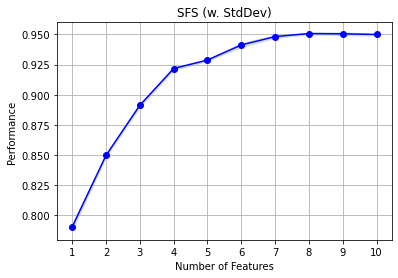

In [69]:
fig1 = plot_sfs(SFS_model.get_metric_dict(),
                kind='std_dev',
                figsize=(6, 4))

plt.title('SFS (w. StdDev)')
plt.grid()
plt.show()

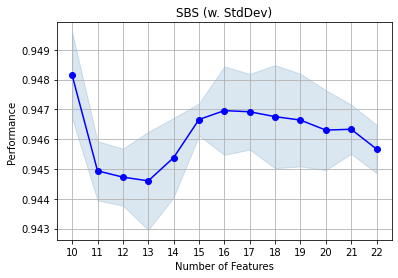

In [70]:
fig2 = plot_sfs(SBS_model.get_metric_dict(),kind='std_dev',figsize=(6, 4))
plt.title('SBS (w. StdDev)')
plt.grid()
plt.show()

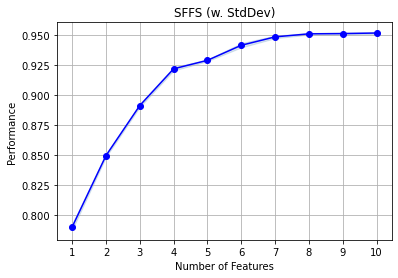

In [71]:
fig3 = plot_sfs(SFFS_model.get_metric_dict(),kind='std_dev',figsize=(6, 4))
plt.title('SFFS (w. StdDev)')
plt.grid()
plt.show()

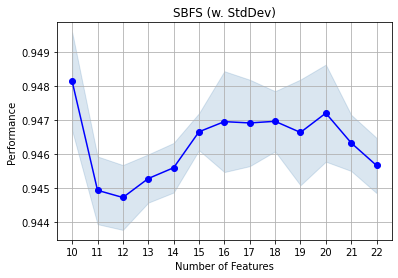

In [72]:
fig4 = plot_sfs(SBFS_model.get_metric_dict(),kind='std_dev',figsize=(6, 4))
plt.title('SBFS (w. StdDev)')
plt.grid()
plt.show()

In [73]:
n_features = X_train.shape[1]
n_features

22

For task 2 vary the features by increasing or decreasing, observe and report the results.

In [74]:
features = []
average_scores = []
for i in range(1, n_features + 1):
    features.append(i)
    new_model_sfs = SFS(DecisionTreeClassifier(random_state=1), forward = True, floating = False, scoring = 'accuracy', k_features=i)
    new_model_sfs.fit(X_train, y_train)
    average_scores.append(new_model_sfs.k_score_)

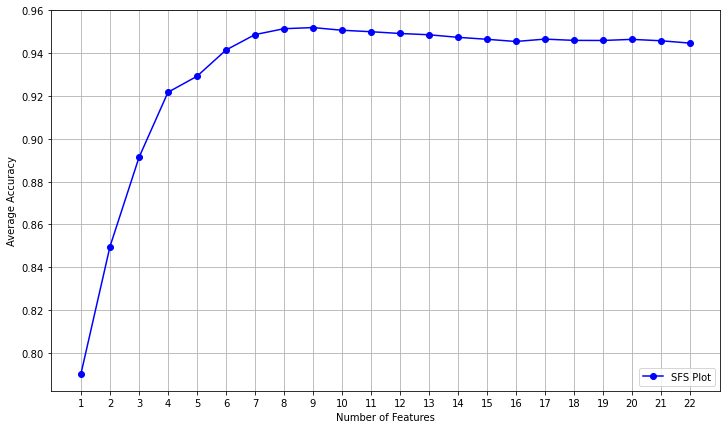

In [75]:
plt.figure(figsize=(12, 7))
plt.plot(features, average_scores, 'b-o', label='SFS Plot')
plt.xlabel('Number of Features')
plt.ylabel('Average Accuracy')
plt.legend(loc='lower right')
plt.xticks(features)
plt.grid()
plt.show()

In [76]:
print(features)
print(average_scores)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0.7903833960456308, 0.8496881632686332, 0.8912649918655335, 0.9217162073206818, 0.9291750066542516, 0.941426709515091, 0.948635286758528, 0.9513974558180622, 0.9519267868836468, 0.9506852575363249, 0.9499923034381327, 0.9491742438526272, 0.9485679179901647, 0.9473841350878605, 0.9464601975253271, 0.9454304176480154, 0.9465371960273735, 0.9459501069381184, 0.9459020087526276, 0.9464217003584612, 0.945776882886886, 0.9446797221994123]


In [8]:
max_val = average_scores.index(max(average_scores))
print("We can see that the best number of features is:", max_val + 1, "with an average accuracy of: ", max(average_scores))

NameError: name 'average_scores' is not defined